In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv


In [2]:
# Sample data
data = pd.DataFrame({
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles'],
    'Year': [2020, 2021, 2020, 2021],
    'Population': [8.4, 8.5, 4.0, 4.1],
    'GDP': [1.7, 1.8, 1.1, 1.2]
})

# Setting hierarchical index
data.set_index(['City', 'Year'], inplace=True)
print(data)

                  Population  GDP
City        Year                 
New York    2020         8.4  1.7
            2021         8.5  1.8
Los Angeles 2020         4.0  1.1
            2021         4.1  1.2


In [3]:
stacked = data.stack()
print(stacked)

City         Year            
New York     2020  Population    8.4
                   GDP           1.7
             2021  Population    8.5
                   GDP           1.8
Los Angeles  2020  Population    4.0
                   GDP           1.1
             2021  Population    4.1
                   GDP           1.2
dtype: float64


In [4]:
unstacked = stacked.unstack()
print(unstacked)

                  Population  GDP
City        Year                 
Los Angeles 2020         4.0  1.1
            2021         4.1  1.2
New York    2020         8.4  1.7
            2021         8.5  1.8


In [5]:
wide_format = data.unstack()
print(wide_format)

            Population       GDP     
Year              2020 2021 2020 2021
City                                 
Los Angeles        4.0  4.1  1.1  1.2
New York           8.4  8.5  1.7  1.8


In [6]:
long_format = wide_format.stack()
print(long_format)

                  Population  GDP
City        Year                 
Los Angeles 2020         4.0  1.1
            2021         4.1  1.2
New York    2020         8.4  1.7
            2021         8.5  1.8


In [7]:
print(data.index.nlevels)

2


In [8]:
swapped = data.swaplevel()
print(swapped)

                  Population  GDP
Year City                        
2020 New York            8.4  1.7
2021 New York            8.5  1.8
2020 Los Angeles         4.0  1.1
2021 Los Angeles         4.1  1.2


In [9]:
sorted_data = data.sort_index(level=0)
print(sorted_data)

                  Population  GDP
City        Year                 
Los Angeles 2020         4.0  1.1
            2021         4.1  1.2
New York    2020         8.4  1.7
            2021         8.5  1.8


In [10]:
reset = data.reset_index()
print(reset)

          City  Year  Population  GDP
0     New York  2020         8.4  1.7
1     New York  2021         8.5  1.8
2  Los Angeles  2020         4.0  1.1
3  Los Angeles  2021         4.1  1.2


In [11]:


regions = ['North', 'South', 'East', 'West']
years = [2020, 2021, 2022]
products = ['A', 'B', 'C']

# Doubling the data
df = pd.DataFrame({
    'Region': regions * 9,  # Repeat each region 9 times (3 years * 3 products)
    'Year': np.tile(np.repeat(years, 3), 4),  # Repeat each year 3 times per region
    'Product': products * 12,  # Repeat product cycle 12 times (4 regions * 3 years)
    'Sales': np.random.randint(100, 500, 36),
    'Profit': np.random.uniform(10, 50, 36).round(2)
})

# Setting a hierarchical index
df.set_index(['Region', 'Year', 'Product'], inplace=True)
print(df)


                     Sales  Profit
Region Year Product               
North  2020 A          285   19.67
South  2020 B          472   20.60
East   2020 C          171   30.88
West   2021 A          472   26.12
North  2021 B          213   39.94
South  2021 C          357   27.29
East   2022 A          489   45.69
West   2022 B          148   30.52
North  2022 C          231   40.72
South  2020 A          317   30.97
East   2020 B          336   10.74
West   2020 C          222   39.98
North  2021 A          374   27.18
South  2021 B          165   10.05
East   2021 C          204   31.60
West   2022 A          445   43.05
North  2022 B          341   46.00
South  2022 C          130   11.17
East   2020 A          436   15.81
West   2020 B          120   19.24
North  2020 C          182   29.17
South  2021 A          321   19.40
East   2021 B          259   19.48
West   2021 C          390   34.20
North  2022 A          216   41.42
South  2022 B          398   45.29
East   2022 C       

Region  Year  Product        
North   2020  A        Sales     285.00
                       Profit     19.67
South   2020  B        Sales     472.00
                       Profit     20.60
East    2020  C        Sales     171.00
                                  ...  
South   2022  A        Profit     44.09
East    2022  B        Sales     490.00
                       Profit     13.61
West    2022  C        Sales     121.00
                       Profit     31.83
Length: 72, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'A'),
  Text(2, 0, 'B'),
  Text(3, 0, 'B'),
  Text(4, 0, 'C'),
  Text(5, 0, 'C'),
  Text(6, 0, 'A'),
  Text(7, 0, 'A'),
  Text(8, 0, 'B'),
  Text(9, 0, 'B'),
  Text(10, 0, 'C'),
  Text(11, 0, 'C'),
  Text(12, 0, 'A'),
  Text(13, 0, 'A'),
  Text(14, 0, 'B'),
  Text(15, 0, 'B'),
  Text(16, 0, 'C'),
  Text(17, 0, 'C'),
  Text(18, 0, 'A'),
  Text(19, 0, 'A'),
  Text(20, 0, 'B'),
  Text(21, 0, 'B'),
  Text(22, 0, 'C'),
  Text(23, 0, 'C'),
  Text(24, 0, 'A'),
  Text(25, 0, 'A'),
  Text(26, 0, 'B'),
  Text(27, 0, 'B'),
  Text(28, 0, 'C'),
  Text(29, 0, 'C'),
  Text(30, 0, 'A'),
  Text(31, 0, 'A'),
  Text(32, 0, 'B'),
  Text(33, 0, 'B'),


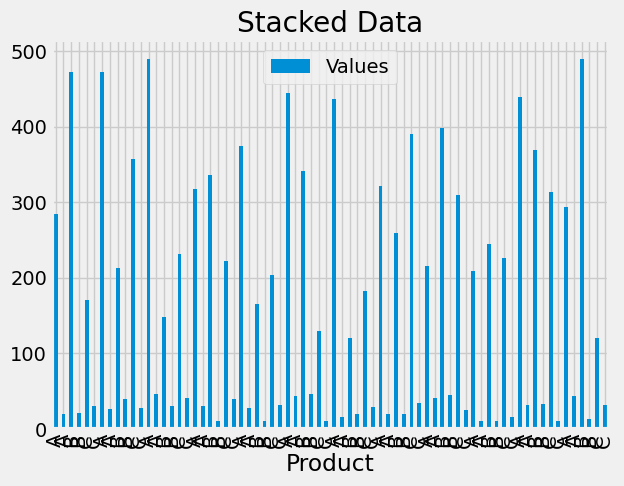

In [26]:
stacked_data = df.stack()
print(stacked_data)

# Visualization
stacked_data.reset_index().rename(columns={0: 'Values'}).plot(kind='bar', x='Product', y='Values', title='Stacked Data')
plt.xticks(rotation=90)

            Sales           Profit              
Product         A    B    C      A      B      C
Region Year                                     
East   2020   436  336  171  15.81  10.74  30.88
       2021   439  259  204  31.81  19.48  31.60
       2022   489  490  310  45.69  13.61  25.46
North  2020   285  245  182  19.67  10.76  29.17
       2021   374  213  314  27.18  39.94  10.87
       2022   216  341  231  41.42  46.00  40.72
South  2020   317  472  226  30.97  20.60  16.03
       2021   321  165  357  19.40  10.05  27.29
       2022   294  398  130  44.09  45.29  11.17
West   2020   209  120  222  10.60  19.24  39.98
       2021   472  369  390  26.12  33.38  34.20
       2022   445  148  121  43.05  30.52  31.83


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '(West, 2021)'),
  Text(0.0, 0, '(East, 2020)'),
  Text(2.0, 0, '(East, 2022)'),
  Text(4.0, 0, '(North, 2021)'),
  Text(6.0, 0, '(South, 2020)'),
  Text(8.0, 0, '(South, 2022)'),
  Text(10.0, 0, '(West, 2021)'),
  Text(12.0, 0, '')])

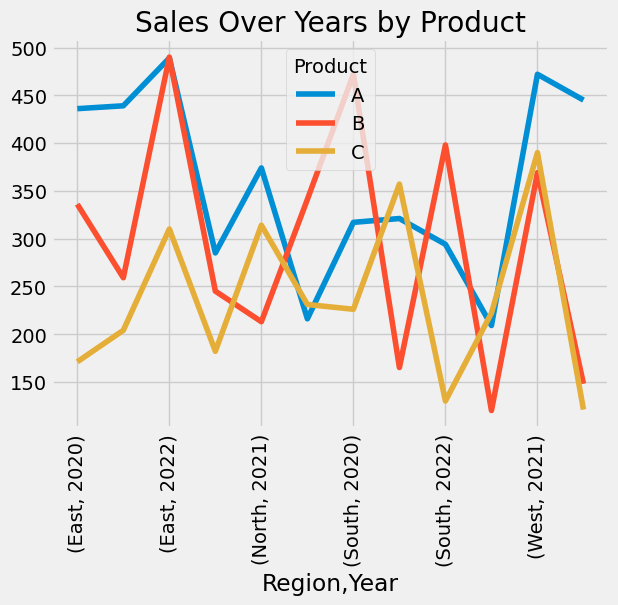

In [24]:
unstacked_data = df.unstack(level=2)
print(unstacked_data)

# Visualization
unstacked_data['Sales'].plot(kind='line', title='Sales Over Years by Product')
plt.xticks(rotation=90)

   Region  Year Product  Sales  Profit
0   North  2020       A    285   19.67
1   South  2020       B    472   20.60
2    East  2020       C    171   30.88
3    West  2021       A    472   26.12
4   North  2021       B    213   39.94
5   South  2021       C    357   27.29
6    East  2022       A    489   45.69
7    West  2022       B    148   30.52
8   North  2022       C    231   40.72
9   South  2020       A    317   30.97
10   East  2020       B    336   10.74
11   West  2020       C    222   39.98
12  North  2021       A    374   27.18
13  South  2021       B    165   10.05
14   East  2021       C    204   31.60
15   West  2022       A    445   43.05
16  North  2022       B    341   46.00
17  South  2022       C    130   11.17
18   East  2020       A    436   15.81
19   West  2020       B    120   19.24
20  North  2020       C    182   29.17
21  South  2021       A    321   19.40
22   East  2021       B    259   19.48
23   West  2021       C    390   34.20
24  North  2022       A  

(array([2019.75, 2020.  , 2020.25, 2020.5 , 2020.75, 2021.  , 2021.25,
        2021.5 , 2021.75, 2022.  , 2022.25]),
 [Text(2019.75, 0, '2019.75'),
  Text(2020.0, 0, '2020.00'),
  Text(2020.25, 0, '2020.25'),
  Text(2020.5, 0, '2020.50'),
  Text(2020.75, 0, '2020.75'),
  Text(2021.0, 0, '2021.00'),
  Text(2021.25, 0, '2021.25'),
  Text(2021.5, 0, '2021.50'),
  Text(2021.75, 0, '2021.75'),
  Text(2022.0, 0, '2022.00'),
  Text(2022.25, 0, '2022.25')])

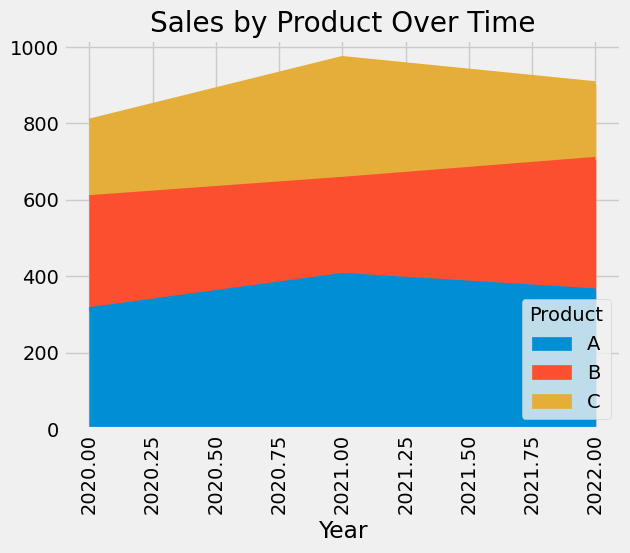

In [23]:

long_format_data = df.reset_index()
print(long_format_data)

# Visualization
long_format_data.pivot_table(index='Year', columns='Product', values='Sales').plot(kind='area', title='Sales by Product Over Time')
plt.xticks(rotation=90)

            Sales           Profit              
Product         A    B    C      A      B      C
Region Year                                     
East   2020   436  336  171  15.81  10.74  30.88
       2021   439  259  204  31.81  19.48  31.60
       2022   489  490  310  45.69  13.61  25.46
North  2020   285  245  182  19.67  10.76  29.17
       2021   374  213  314  27.18  39.94  10.87
       2022   216  341  231  41.42  46.00  40.72
South  2020   317  472  226  30.97  20.60  16.03
       2021   321  165  357  19.40  10.05  27.29
       2022   294  398  130  44.09  45.29  11.17
West   2020   209  120  222  10.60  19.24  39.98
       2021   472  369  390  26.12  33.38  34.20
       2022   445  148  121  43.05  30.52  31.83


<Axes: title={'center': 'Wide Format Sales by Product'}, xlabel='Region,Year'>

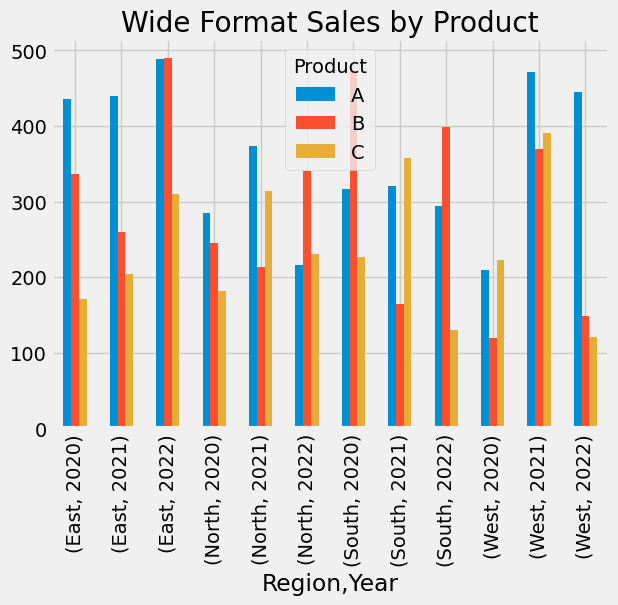

In [16]:
wide_format_data = df.unstack()
print(wide_format_data)

# Visualization
wide_format_data['Sales'].plot(kind='bar', title='Wide Format Sales by Product')


In [22]:
swapped_data = df.swaplevel('Year', 'Region')
print(swapped_data)

# Visualization
swapped_data.sort_index().reset_index().pivot_table(index='Region', columns='Product', values='Sales').plot(kind='heatmap', title='Sales Heatmap')


                     Sales  Profit
Year Region Product               
2020 North  A          285   19.67
     South  B          472   20.60
     East   C          171   30.88
2021 West   A          472   26.12
     North  B          213   39.94
     South  C          357   27.29
2022 East   A          489   45.69
     West   B          148   30.52
     North  C          231   40.72
2020 South  A          317   30.97
     East   B          336   10.74
     West   C          222   39.98
2021 North  A          374   27.18
     South  B          165   10.05
     East   C          204   31.60
2022 West   A          445   43.05
     North  B          341   46.00
     South  C          130   11.17
2020 East   A          436   15.81
     West   B          120   19.24
     North  C          182   29.17
2021 South  A          321   19.40
     East   B          259   19.48
     West   C          390   34.20
2022 North  A          216   41.42
     South  B          398   45.29
     East   C       

ValueError: heatmap is not a valid plot kind

In [20]:
reset_data2 = df.reset_index()
print(reset_data2)

# Visualization
reset_data2.pivot(index='Year', columns='Region', values='Sales').plot(kind='line', title='Sales by Region Over Time')


   Region  Year Product  Sales  Profit
0   North  2020       A    285   19.67
1   South  2020       B    472   20.60
2    East  2020       C    171   30.88
3    West  2021       A    472   26.12
4   North  2021       B    213   39.94
5   South  2021       C    357   27.29
6    East  2022       A    489   45.69
7    West  2022       B    148   30.52
8   North  2022       C    231   40.72
9   South  2020       A    317   30.97
10   East  2020       B    336   10.74
11   West  2020       C    222   39.98
12  North  2021       A    374   27.18
13  South  2021       B    165   10.05
14   East  2021       C    204   31.60
15   West  2022       A    445   43.05
16  North  2022       B    341   46.00
17  South  2022       C    130   11.17
18   East  2020       A    436   15.81
19   West  2020       B    120   19.24
20  North  2020       C    182   29.17
21  South  2021       A    321   19.40
22   East  2021       B    259   19.48
23   West  2021       C    390   34.20
24  North  2022       A  

ValueError: Index contains duplicate entries, cannot reshape

                     Sales  Profit
Region Year Product               
East   2020 A          436   15.81
            B          336   10.74
            C          171   30.88
North  2020 A          285   19.67
            B          245   10.76
            C          182   29.17
South  2020 A          317   30.97
            B          472   20.60
            C          226   16.03
West   2020 A          209   10.60
            B          120   19.24
            C          222   39.98
East   2021 A          439   31.81
            B          259   19.48
            C          204   31.60
North  2021 A          374   27.18
            B          213   39.94
            C          314   10.87
South  2021 A          321   19.40
            B          165   10.05
            C          357   27.29
West   2021 A          472   26.12
            B          369   33.38
            C          390   34.20
East   2022 A          489   45.69
            B          490   13.61
            C       

<Axes: title={'center': 'Profit by Region Over Time'}, xlabel='Year'>

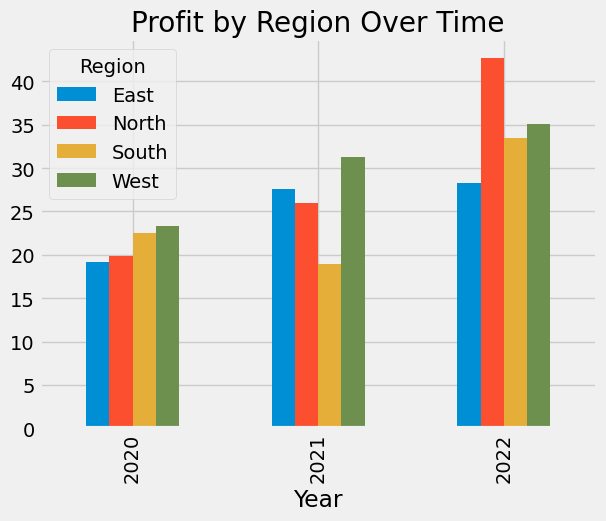

In [21]:
sorted_data2 = df.sort_index(level=1)
print(sorted_data2)

# Visualization
sorted_data2.reset_index().pivot_table(index='Year', columns='Region', values='Profit').plot(kind='bar', title='Profit by Region Over Time')


In [19]:
# read in all our data
crop_data = pd.read_csv("../input/crop-yield-of-a-farm/crop_yield_data.csv")

# set seed for reproducibility
np.random.seed(0) 

In [ ]:
crop_data.head()

In [ ]:
# Setting hierarchical index
crop_data.set_index(['rainfall_mm','soil_quality_index'], inplace=True)
print(crop_data)

In [ ]:
stacked = crop_data.stack()
print(stacked)

In [ ]:
unstacked = stacked.unstack()
print(unstacked)

In [ ]:
wide_format = crop_data.unstack()
print(wide_format)

In [ ]:
long_format = wide_format.stack()
print(long_format)

In [ ]:
print(crop_data.index.nlevels)

In [ ]:
swapped = crop_data.swaplevel()
print(swapped)

In [ ]:
sorted_data = crop_data.sort_index(level=0)
print(sorted_data)

In [ ]:
reset = crop_data.reset_index()
print(reset)